# Imprting Required  Libraries

In [9]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

sns.set_style('whitegrid')
sns.set_context('talk')

params = {'legend.fontsize': 'small',
          'figure.figsize': (30, 20),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

# Importing Dataset

In [7]:
data = pd.read_csv("Retail_Data.csv")
data.head(10)

,Trans_ID,Item
0,1,Bread
1,1,Butter
2,1,Dairy
3,2,Nachos
4,2,Butter
5,2,Dairy
6,3,Juice
7,3,Jam
8,3,Egg
9,4,Juice


# Plotting the Variables

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

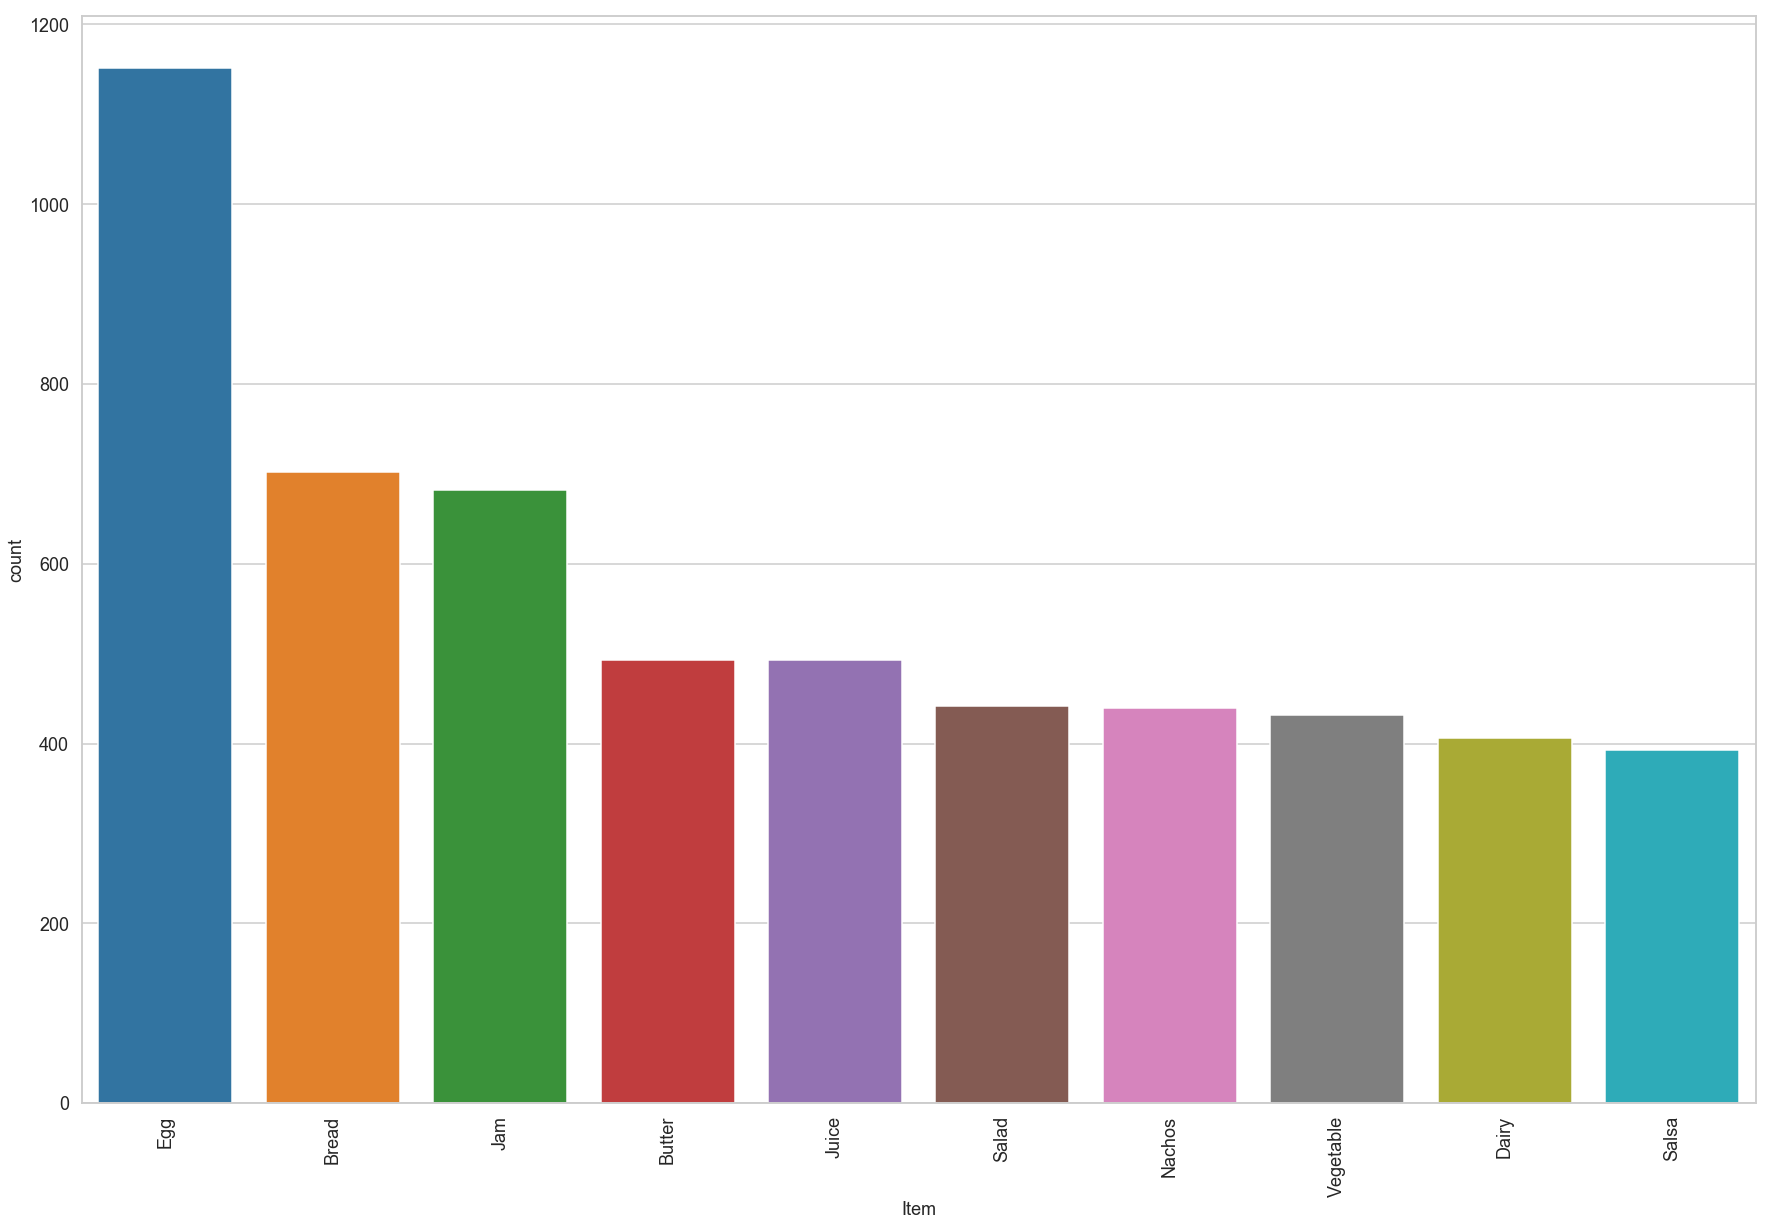

In [10]:
sns.countplot(x = 'Item', data = data, order = data['Item'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

# Model Building

In [11]:
df = data.groupby(['Trans_ID','Item']).size().reset_index(name='count')
basket = (df.groupby(['Trans_ID', 'Item'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Trans_ID'))#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)

In [14]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
79,"(Jam, Salad)",(Fruits),0.0120,0.1825,0.0120,1.0,5.479452,0.009810,inf
26,(Fruits),(Salad),0.1825,0.2210,0.1825,1.0,4.524887,0.142168,inf
56,"(Nachos, Butter)",(Dairy),0.0320,0.2030,0.0320,1.0,4.926108,0.025504,inf
72,"(Salsa, Egg)",(Nachos),0.1175,0.2200,0.1175,1.0,4.545455,0.091650,inf
74,"(Egg, Nachos)",(Salsa),0.1175,0.1965,0.1175,1.0,5.089059,0.094411,inf
